## 奇异值分解
奇异值分解(`singular value decomposition, SVD`)是线性代数中一种常用的矩阵分解和数据降维方法，解释了矩阵分析的本质变换。奇异值分解在自然语言中的潜在语义索引、推荐系统中的特征分解、图像去噪与压缩等方面都有着应用。

### 1 SVD算法的原理推导
要计算特征值和特征向量，一个必要条件是矩阵A必须要为`nxn`方阵，当遇到`mxn`，`m≠n`的非方阵矩阵时，就无法使用特征值进行分解了，**非方阵矩阵的分解需要借助SVD方法**。

### 2 SVD的算法实现 

In [66]:
import numpy as np

A = np.array([[0, 1], [1, 1], [1, 0]])
U, S, V = np.linalg.svd(A, full_matrices=True) # 矩阵分解
A, U, S, V

(array([[0, 1],
        [1, 1],
        [1, 0]]),
 array([[-0.40824829,  0.70710678,  0.57735027],
        [-0.81649658,  0.        , -0.57735027],
        [-0.40824829, -0.70710678,  0.57735027]]),
 array([1.73205081, 1.        ]),
 array([[-0.70710678, -0.70710678],
        [-0.70710678,  0.70710678]]))

In [67]:
U[:, :2]

array([[-0.40824829,  0.70710678],
       [-0.81649658,  0.        ],
       [-0.40824829, -0.70710678]])

In [68]:
U[:, :2] * S

array([[-0.70710678,  0.70710678],
       [-1.41421356,  0.        ],
       [-0.70710678, -0.70710678]])

In [69]:
U[:, :2] * S @ V

array([[ 1.11022302e-16,  1.00000000e+00],
       [ 1.00000000e+00,  1.00000000e+00],
       [ 1.00000000e+00, -4.44089210e-16]])

In [71]:
A - U[:, :2] * S @ V # 除了一点浮点误差，基本可以恢复

array([[-1.11022302e-16,  5.55111512e-16],
       [ 3.33066907e-16,  6.66133815e-16],
       [ 2.22044605e-16,  4.44089210e-16]])

### 3 sklearn截断SVD算法示例

In [72]:
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import random as sparse_random

X = sparse_random(100, 100, density=0.01, format='csr', random_state=42) # 创建稀疏数据X

svd = TruncatedSVD(n_components=2, n_iter=7, random_state=42) # 基于截断SVD算法对X进行降维，降维的维度为5，即输出前5个奇异值
svd.fit(X)

svd.singular_values_

array([1.55360837, 1.51211799])

### 4 基于SVD的图像去噪
将SVD用于图像压缩算法，主要思路是保持像素矩阵前k个奇异值，并在此基础上做图像恢复。

In [73]:
import numpy as np
from PIL import Image
from tqdm import tqdm
import matplotlib.pyplot as plt

# 定义图像恢复函数
def restore(u, s, v, K):
    """
    输入：
    u：左奇异矩阵
    v：右奇异矩阵
    s：奇异值矩阵
    K：奇异值个数
    """
    m, n = len(u), len(v)
    a = np.zeros((m, n))
    for k in range(K):
        uk = u[:, k].reshape(m, 1)
        vk = v[k].reshape(1, n)
        a += s[k] * np.dot(uk, vk) # 前k个奇异值的汇总
    a = a.clip(0, 255) # 意思是把小于min的数全部置换为min，大于max的数全部置换为max，在 [min,max]之间的数则不变
    return np.rint(a).astype('uint8') # np.rint根据四舍五入取整

((438, 438), (640, 640))

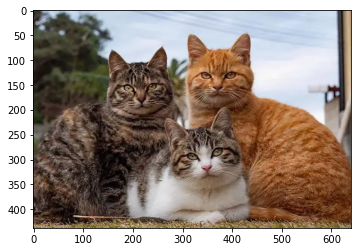

In [74]:
img = np.array(Image.open('./cat.webp', 'r'))
plt.imshow(Image.open('./cat.webp', 'r'))
# 对RGB图像进行奇异值分解
u_r, s_r, v_r = np.linalg.svd(img[:, :, 0])
u_g, s_g, v_g = np.linalg.svd(img[:, :, 1])
u_b, s_b, v_b = np.linalg.svd(img[:, :, 2])
u_r.shape, v_r.shape

In [75]:
K = 50 # 使用50个奇异值
# 恢复图像
for k in tqdm(range(1, K+1)):
    R = restore(u_r, s_r, v_r, k)
    G = restore(u_g, s_g, v_g, k)
    B = restore(u_b, s_b, v_b, k)
    I = np.stack((R, G, B), axis=2)
    if k % 10 == 0:
        Image.fromarray(I).save(f'./svd/svd_{k}.jpg')

100%|██████████| 50/50 [00:09<00:00,  5.28it/s]


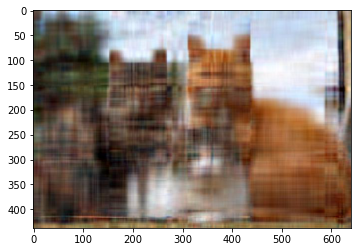

In [76]:
plt.imshow(Image.open('./svd/svd_10.jpg', 'r'))

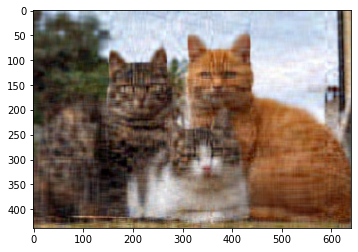

In [77]:
plt.imshow(Image.open('./svd/svd_20.jpg', 'r'))

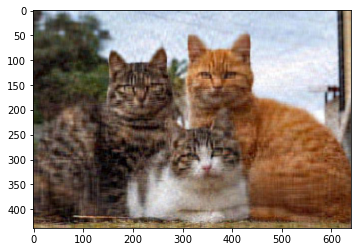

In [79]:
plt.imshow(Image.open('./svd/svd_30.jpg', 'r'))

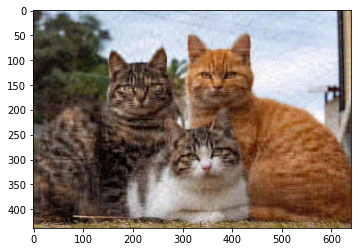

In [80]:
plt.imshow(Image.open('./svd/svd_40.jpg', 'r'))

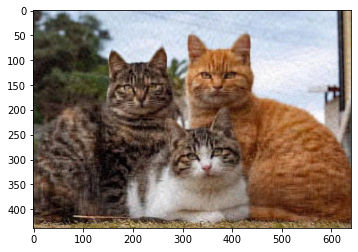

In [81]:
plt.imshow(Image.open('./svd/svd_50.jpg', 'r'))